In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from pattern.nl import parse, split
from collections import Counter
from gensim.models import KeyedVectors
# Need the interactive Tools for Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from adjustText import adjust_text
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from random import sample
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
import seaborn as sns


stopz = 'http://rubenros.nl/wp-content/uploads/2019/08/stopwords-nl.txt'
req = requests.get(stopz)
stopz = str(req.content)
stopz = stopz.split('\\n')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [58]:
os.chdir('D:/Rampen/models/periods')
model = KeyedVectors.load('model-1830-1850.w2v')
os.chdir('D:/Rampen/ngrams')

l = sorted(glob.glob('*bigrams.csv'))

In [22]:
df = pd.DataFrame()

for i in l[0:100]:
    d= pd.read_csv(i)
    d = d[d['gram'].str.contains("_ramp")]
    d['gram'] = d['gram'].str.split('_').str[0]
    d = d[~d['gram'].isin(stopz)]
    d['year'] = i[0:4]
    d = d.groupby(['gram','year'],as_index=False).agg('sum')
    #d = d.reset_index(drop=True)
    df = df.append(d)

In [23]:
dfa = df.pivot(columns='year',index='gram',values='count')
dfa = dfa.reset_index()
dfa.head()

year,gram,1750,1751,1752,1753,1754,1755,1756,1757,1758,...,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00boudingrjier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,011cr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,011herttelbasre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
def PlotWords(df, input_term, model, start_year,end_year):
    list_words = [k for k,v in model.most_similar(input_term, topn=100)] + input_term
    
    for c in df.columns[1:]:
        df[c] = df[c] / df[c].sum()
    
    tdf = df[df['gram'].isin(list_words)].T
    list_words = list(tdf.iloc[0,])
    tdf.columns = list_words
    tdf = tdf.iloc[1:,:]
    tdf['y'] = tdf.index.astype(int)
    tdf = tdf[(tdf['y'] >= start_year) & (tdf['y'] <= end_year)]
    #tdf.plot.area(x='y',y=list_words,figsize=(15,7))
    
    tdf= tdf.reset_index(drop=True)

    col = sns.color_palette("tab20b", len(list_words))
    x_lab = "Years"
    y_lab = "Absolute Frequency"
    title = "Collocates most similar to: " + " ".join(input_term)
    
    x_values = list(tdf['y'])
    y_values = [list(tdf[c]) for c in list_words]
    #fig, ax = plt.subplots(facecolor='white',figsize=(30, 10))
    labels = list_words
    
    #plt.stackplot(x_values,y_values, labels=list_words, colors = col) #baseline="wiggle", 
    #plt.legend(loc='upper left')

    #ax.set_facecolor("white")
    #box = ax.get_position()
    #hfont = {'fontname':'Helvetica'}

    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #lgd = ax.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.06))
    
    #for ticks in ax.xaxis.get_ticklines() + ax.yaxis.get_ticklines():
    #    ticks.set_color("white")
    #for pos in ['top', 'bottom', 'right', 'left']:
    #    ax.spines[pos].set_edgecolor("white")
    
    #plt.yticks(fontsize=12)
    #plt.xticks(fontsize=14)

    #plt.title(title, fontsize=18)
    return tdf

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


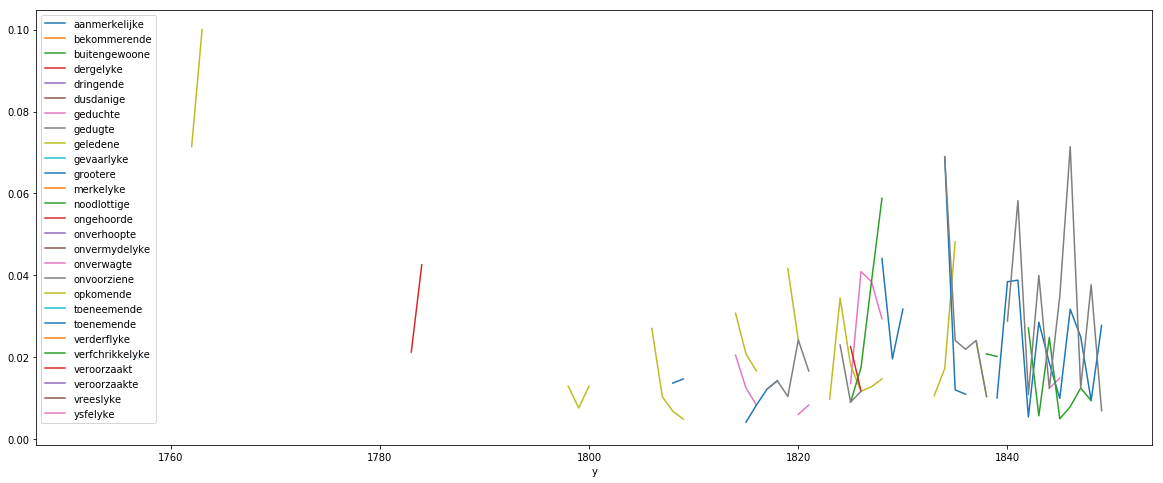

In [72]:
l=PlotWords(dfa, ['onvoorziene'], model, 1750, 1850)
l.plot(x='y',y=list(l.columns[:-1]),figsize = (20,8))

In [65]:
os.chdir('D:/Rampen/models/periods')
for m in glob.glob('model*.w2v'):
    model = KeyedVectors.load(m)
    print([k for k,v in dict(model.most_similar('ramp',topn=8)).items()])

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


['verwoesting', 'fchrik', 'elende', 'ontfteltenis', 'rampen', 'schrik', 'veroorzaak', 'verfchriklyke']
['rampen', 'onheilen', 'plaag', 'verwoesting', 'ellende', 'ongelukkigen', 'ongelukken', 'gebeurtenis']
['rampen', 'onheilen', 'ellende', 'ongelukkige', 'watervloed', 'overftrooming', 'ellenden', 'verwoesting']
['ellende', 'rampfpoed', 'ongelukkig', 'verwoesting', 'ongelukkige', 'ongelukkigen', 'elende', 'ontzettend']


In [68]:
dfa.sort_values('1800',ascending=False)

year,gram,1750,1751,1752,1753,1754,1755,1756,1757,1758,...,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
651,dier,NaN,NaN,NaN,NaN,0.037037,0.018868,NaN,NaN,NaN,...,NaN,0.009709,NaN,0.011429,NaN,0.014925,0.031746,0.0500,0.009434,0.006944
407,charles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2181,onvoorziene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.028846,0.058252,0.010870,0.040000,0.012422,0.034826,0.071429,0.0125,0.037736,0.006944
2722,veele,NaN,NaN,NaN,NaN,NaN,0.094340,0.020408,NaN,0.03125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933,nieuwe,NaN,NaN,NaN,0.055556,NaN,0.018868,0.020408,NaN,0.03125,...,0.048077,0.009709,0.038043,0.022857,0.012422,0.024876,0.007937,0.0500,0.009434,0.034722
1820,menigvuldige,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.005435,0.005714,NaN,NaN,NaN,NaN,NaN,NaN
3406,„,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1761,logjf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1794,man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1683,lands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  75.3308418725216,
  60.97378496361432,
  53.35849477557957,
  42.766002493325104,
  38.203762781090596,
  34.11732038346408,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  12.211962013993356,
  24.134874426168654,
  24.557259840634497,
  22.14064523146386,
  17.15542302020906,
  18.886220553582575,
  47.105266518449774,

In [140]:
t

,elementen,gewesten,landstreek,lauden,monarchie,nabuurschap,natie,oorden,streken,volken,volkeren,volkeu,volkplantingen,vorsten,y
0,0,0,0,0,0,0,4.68543,0,0,0,0,0,0,0,1780
1,0,0,0,0,0,0,4.66669,0,0,0,0,0,0,0,1781
2,0,0,0,0,0,0,5.00025,0,0,0,0,0,0,0,1782
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1783
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1784
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1785
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1786
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1787
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1788
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1789
